# KNN-based Moving-Least-Squares Approximation in 1-dimensional Space


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sigmaepsilon.math import atleast2d

%matplotlib inline
plt.ioff()  # Turn off interactive plotting

number_of_data_points = 100
number_of_sampling_points = 16

fig, axs = plt.subplots(1, 1, layout="constrained")

coords = np.linspace(0, 1, number_of_data_points)
random_noise = np.random.normal(0, 0.1, coords.shape)
data = np.sin(2 * np.pi * coords) + random_noise
data = atleast2d(data, back=True)
coords = np.zeros((number_of_data_points, 3))
coords[:, 0] = np.linspace(0, 1, number_of_data_points)

axs.plot(coords[:, 0], data[:, 0], "o", color="black")
axs.set_title("MLS approximation using KNN, vs. support domain")

def plot_on_axis(ax, coords_approx, data_approx, *args, **kwargs):
    ax.plot(
        coords_approx,
        data_approx,
        *args,
        markersize=4,
        **kwargs
    )
    ax.legend()

In [2]:
data.shape, coords.shape

((100, 1), (100, 3))

In [3]:
from typing import Callable
from sigmaepsilon.math.approx import moving_least_squares
from sigmaepsilon.math.approx import ConstantWeightFunction
from sigmaepsilon.math.approx import MLSApproximator

coords_approx = np.zeros((number_of_sampling_points, 3))
coords_approx[:, 0] = np.linspace(0, 1, number_of_sampling_points)
approximator = MLSApproximator(coords, data, k=4)
data_approx = approximator.approximate(coords_approx)
plot_on_axis(axs, coords_approx[:, 0], data_approx, label="CWF kNN (k=4)")

coords_approx = np.zeros((number_of_sampling_points, 3))
coords_approx[:, 0] = np.linspace(0, 1, number_of_sampling_points)
approximator = MLSApproximator(coords, data, k=8)
data_approx = approximator.approximate(coords_approx)
plot_on_axis(axs, coords_approx[:, 0], data_approx, label="CWF kNN (k=8)")


def approximate(approximator: Callable):
    data_approx = [approximator(x)[0][0] for x in coords_approx[:, 0]]
    return np.array(data_approx)


w = ConstantWeightFunction(value=1, dim=1)
approx = moving_least_squares(coords[:, 0], data[:, 0], deg=1, order=2, w=w)
data_approx = approximate(approx)
plot_on_axis(axs, coords_approx[:, 0], data_approx, label="CWF ----")

w = ConstantWeightFunction(value=1, dim=1, supportdomain=[0.2])
approx = moving_least_squares(coords[:, 0], data[:, 0], deg=1, order=2, w=w)
data_approx = approximate(approx)
plot_on_axis(axs, coords_approx[:, 0], data_approx, label="CWF 0.2")

w = ConstantWeightFunction(value=1, dim=1, supportdomain=[0.1])
approx = moving_least_squares(coords[:, 0], data[:, 0], deg=1, order=2, w=w)
data_approx = approximate(approx)
plot_on_axis(axs, coords_approx[:, 0], data_approx, label="CWF 0.1")

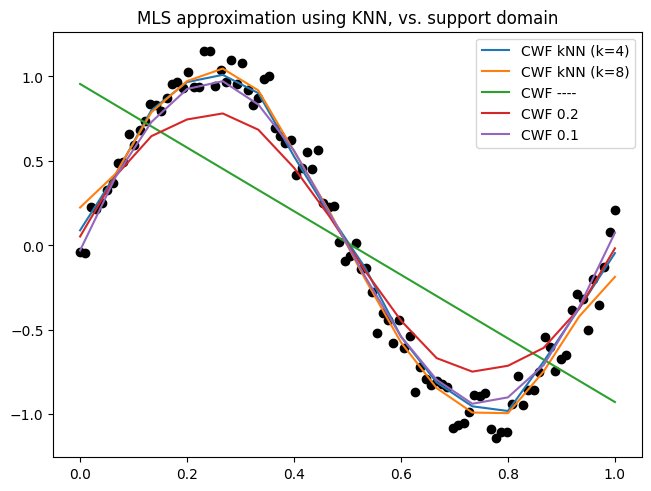

In [4]:
plt.show()